In [31]:
import matplotlib.pyplot as plt
from Objects.Simulation import Simulation
import numpy as np
%pylab
%matplotlib inline

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


In [32]:
from matplotlib import lines, markers
from cycler import cycler

# Create cycler object. Use any styling from above you please
monochromeWithMarker = monochrome = (cycler('color', ['k']) * cycler('linestyle', ['-', '--', ':', '-.']) * cycler('marker', [ '.' ,'^']))
monochromeNoMarker = (cycler('color', ['k']) * cycler('linestyle', ['-', '--', ':', '-.']) * cycler('marker', [',']))
monochrome = monochromeNoMarker.concat(monochromeWithMarker)
# Print examples of output from cycler object. 
# A cycler object, when called, returns a `iter.cycle` object that iterates over items indefinitely
print("number of items in monochrome:", len(monochrome))
# Overriding styles for current script
plt.rcParams['axes.grid'] = True
plt.rcParams['axes.prop_cycle'] = monochrome
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.bottom'] = False
plt.rcParams['axes.spines.left'] = False
plt.rcParams['figure.figsize'] = (12,6)
MARKEREVERY = 200

number of items in monochrome: 12


In [33]:
dashList = [(5,2),(2,5),(4,10),(3,3,2,2),(5,2,20,2), (10,4,2,5), (4,10,5,2)]

In [34]:
def plot_one_key(x_timeline, ydata, key, keys):
    if len(keys) <=5:
        plt.plot(x_timeline, ydata , label = str(key+1), markevery=MARKEREVERY)
    else:
        plt.plot(x_timeline, ydata, markevery=MARKEREVERY)

In [35]:
def plot_one_record(record_zipped, dimension, x_timeline, start = 0, legend=True):
    keys = record_zipped.keys()
    start_filter = (x_timeline >= start)
    x_timeline = x_timeline[start_filter]
    for key in keys:
        ydata = record_zipped[key][dimension]
        ydata = ydata[start_filter]
        plot_one_key(x_timeline, ydata, key ,keys)
    if legend:
        plt.legend(title="Vehicle Sequence in Queue")
    ylabelmap = {
        0:"Acceleration",
        1:"Speed",
        2:"Distance to the Initial Start Line",
        3:"Headway"
    }
    ylabel = ylabelmap[dimension]
    plt.ylabel(ylabel)
    plt.xlabel("Time (second)")


In [36]:
def zip_records(records):
    record_zipped = {}
    for key in records.keys():
        record_zipped[key] = np.array(list(zip(*records[key].values())))
    return record_zipped

In [37]:
def plot_records(p):
    records = p.records
    x_timeline = np.array(list(records[0].keys()))
    x_timeline = x_timeline / 1000
    record_zipped = zip_records(records)
    plot_one_record(record_zipped, 0, x_timeline, start=0)
    plt.show()
    plot_one_record(record_zipped, 1, x_timeline, start=0)
    plt.show()
    plot_one_record(record_zipped, 2, x_timeline, start=0)
    plt.show()
    plot_one_record(record_zipped, 3, x_timeline, start=4)
    plt.show()

def plot_two_subplots(p1,p2,dim, start=0):
    r1 = p1.records
    r2 = p2.records
    xt1 = np.array(list(r1[0].keys()))/1000
    xt2 = np.array(list(r2[0].keys()))/1000
    rz1 = zip_records(r1)
    rz2 = zip_records(r2)
    plt.subplot(121)
    plot_one_record(rz1, dim, xt1, start, legend=False)
    plt.subplot(122)
    plot_one_record(rz2, dim, xt2, start, legend=False)
    plt.legend(title="Vehicle Sequence in Queue")
    plt.show()
    
def cal_avg_delay(p):
    delays = []
    for car in p.platoon:
        if car.delay <0:
            raise Exception("Vehicle hasn't pass loc = 0 point.")
        delays.append(car.delay)
    return np.mean(delays), np.max(delays)

In [38]:
def cal_avg_avg_delay(times, number_vehicles, intended_speed):
    delays = []
    highest_delays = []
    for i in range(times):
        p = sim.run_gipps_simluation(n = number_vehicles, intend_speed = intended_speed, randomness = True)
        delays.append(cal_avg_delay(p)[0])
        highest_delays.append(cal_avg_delay(p)[1])
    return np.mean(delays), np.max(highest_delays)

In [39]:
simulation_time = 30 # seconds
number_vehicles = 5 # number of vehicles
intended_speed = 20 # intended speed / speed limit of the road
sim = Simulation(time = simulation_time, simStep=10)

In [40]:
acda = sim.run_cav_simluation(n = number_vehicles, intend_speed = intended_speed, ACDA=True)
print("Average delay is {}, the highest delay is {}".format(*cal_avg_delay(acda)))

Average delay is 12.552179201734578, the highest delay is 14.564280529653097


In [41]:
cav = sim.run_cav_simluation(n = number_vehicles, intend_speed = intended_speed, ACDA=False)
print("Average delay is {}, the highest delay is {}".format(*cal_avg_delay(cav)))

Average delay is 8.574905048450946, the highest delay is 9.314013655677833


In [42]:
randomness = False # Gipps Model randomness
gipps = sim.run_gipps_simluation(n = number_vehicles, intend_speed = intended_speed, randomness = randomness)
print("Average delay is {}, the highest delay is {}".format(*cal_avg_delay(gipps)))

Average delay is 8.163510241967574, the highest delay is 8.541891680603186


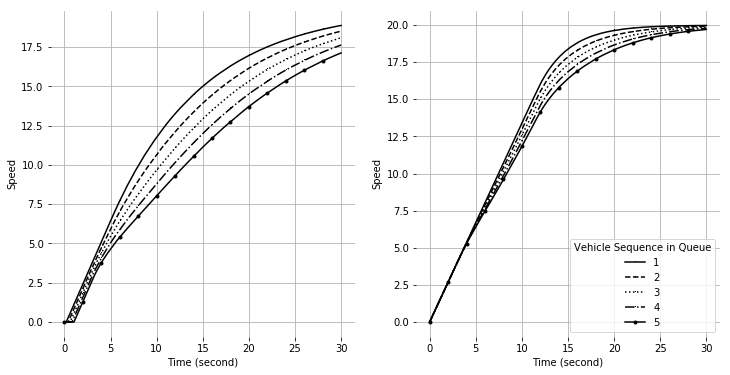

In [43]:
plot_two_subplots(acda,cav,1)

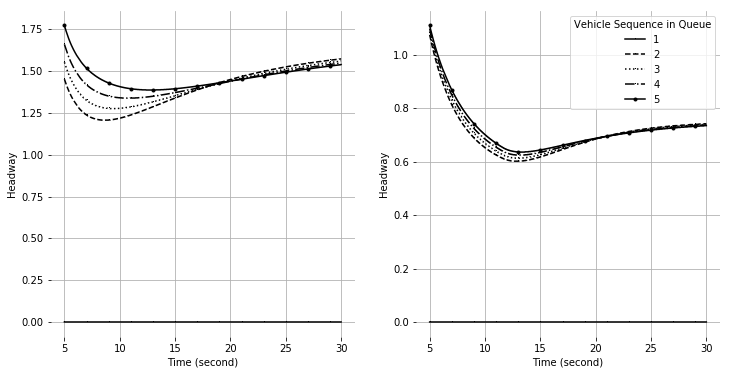

In [46]:
plot_two_subplots(acda,cav,3, start=5)